In [22]:
import nltk

In [88]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import *
from sqlalchemy.orm import sessionmaker
engine = create_engine("sqlite:///crypto_db.db")
query = '''select * from crypto_tweet_data '''
df = pd.read_sql(query, engine)
df

,twitter_user_id,tweet_text,date_tweet_created,retweet_count,reply_count,like_count,quote_rt_count,coin_id,date_uploaded
0,1384658067116134400,"This man, @IOHK_Charles , has so many importan...",2021-04-20 23:59:43,0,0,0,0,ADA,2021-04-25
1,1384657835796189190,Who else feeling 2500% lucky today?\nIf you we...,2021-04-20 23:58:48,1,2,8,0,ADA,2021-04-25
2,1384657768657743872,"#Cardano ""... Sure as Kilimanjaro rises like ...",2021-04-20 23:58:32,2,0,14,0,ADA,2021-04-25
3,1384657528882139143,@OneTrippyPlanet @Dean_00K @CardanoDan I would...,2021-04-20 23:57:35,0,1,1,0,ADA,2021-04-25
4,1384657372963028995,"Why am I seeing so many crypto exit tweets, vi...",2021-04-20 23:56:58,0,2,0,0,ADA,2021-04-25
...,...,...,...,...,...,...,...,...,...
210529,1387196243336642562,I buy #Algorand at a low price. \nI loan my $A...,2021-04-28 00:05:31,7,1,40,1,ALGO,2021-04-29
210530,1387196188609417220,Asshole. #algo https://t.co/nNa4LlTR0Q,2021-04-28 00:05:18,0,0,0,0,ALGO,2021-04-29
210531,1387195606083334148,@version_coin Version Coin giveaway 🚀🙌 \n\nGoo...,2021-04-28 00:02:59,0,0,0,0,ALGO,2021-04-29
210532,1387195507471224832,@KeliCallaghan @Algorand @pNetworkDeFi Can you...,2021-04-28 00:02:36,0,0,0,0,ALGO,2021-04-29


In [ ]:
filtered_df = df[(df['coin_id']== 'MATIC') & (df['date_uploaded'] == '2021-04-28')][['tweet_text']

In [ ]:
matic_df_filtered = test[(test['date_tweet_created'] > '2021-04-27 07:00:00') 
             & (test['date_tweet_created'] < '2021-04-28 07:00:01')]['tweet_text']

In [136]:

txt = matic_df_filtered.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
blocker_words = ['doge', 'crypto', 'btc', 'binance', 'iota', 'litecoin', 'usdt', 
            'ltc', 'cardano', 'matic', 'algo', 'bitcoin', 'ethereum', 'link', 
            'algorand', 'cryptocurrency', 'dogecoin', 'https', 'ripple', 'cryptocurrencies',  'blockchain', 'waves'
           , 'orchid', 'stellar', 'tron', 'miota', 'dash', 'waves', 'aave', 'steem', 'this', 'hour', 'your', 'with'
           'exchange', 'tomo', 'price', 'with', 'free', 'altcoins', 'market', 'exchange', 'prices', 'altcoin', 
            'giveaway', 'defi', 'atom', 'have', 'uniswap', 'trading', 'update', 'will', 'from', 'dogecoins', 'kripto'
           , 'theta', 'cryptonews', 'cake', 'that', 'coinbase', 'pancakeswap', '1inchnetwork', 'welcome', 'bonus'
           , 'myteamchain', 'myteamcoin', 'here', 'earn', 'coins', 'register', 'live', 'safe', 'klay', 'bitcoins'
           , 'blackcoins_', 'project', 'celsiusnetwork', 'cryptocurrencynews', 'cryptobot', 'what', 'wallet', 'unknown'
           , 'safemoon', 'moon', 'more', 'info', 'coin', 'just', 'days', 'about', 'join', 'polkadot', 
            'than', 'some', 'polygon', '0xpolygon', 'the', 'eth', 'and', 'ada', 'xlm', 'bnb', 'xrp', 'zilliqa', '//t.co/kicq18rgq6 '
           , '//t.co/kicq18rgq6', 'vetusdt', 'maticusdt', 'vechain']


stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
most_com = word_dist.most_common()

filtered_results = [d for d in most_com if len(str(d[0]))> 3 and str(d[0]).lower() not in blocker_words]

rslt = pd.DataFrame(filtered_results,
                    columns=['Word', 'Frequency'])

print(rslt.head(20))


            Word  Frequency
0           hold         67
1         target         55
2          going         45
3          right         40
4           sell         40
5          today         35
6          chart         32
7           miss         31
8          video         31
9           dent         28
10        urgent         27
11          btc​         27
12      elonmusk         26
13        profit         26
14          good         25
15          next         24
16          like         24
17  maticnetwork         23
18          pump         23
19        change         23


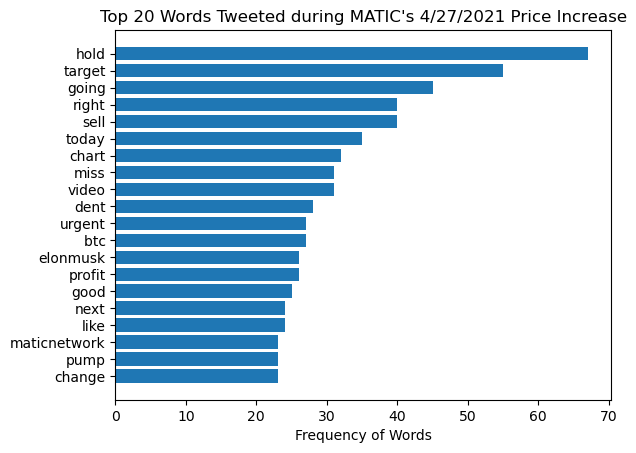

''

<Figure size 640x480 with 0 Axes>

In [143]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(rslt['Word'][:20], rslt['Frequency'][:20], align='center')
ax.set_yticks(rslt['Word'][:20])
ax.set_yticklabels(rslt['Word'][:20])
ax.invert_yaxis()
ax.set_xlabel('Frequency of Words')
ax.set_title('Top 20 Words Tweeted during MATIC\'s 4/27/2021 Price Increase')

plt.show()
plt.tight_layout()
;